In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
%matplotlib inline 

In [5]:
from platform import python_version

print(python_version())

3.7.6


In [6]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes-2.data", names= colnames)

In [7]:
pima_df.shape

(768, 9)

In [8]:
pima_df.head(50)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
pima_df[~pima_df.applymap(np.isreal).all(1)]

,preg,plas,pres,skin,test,mass,pedi,age,class


In [10]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
pima_df.groupby(["class"]).count() 

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


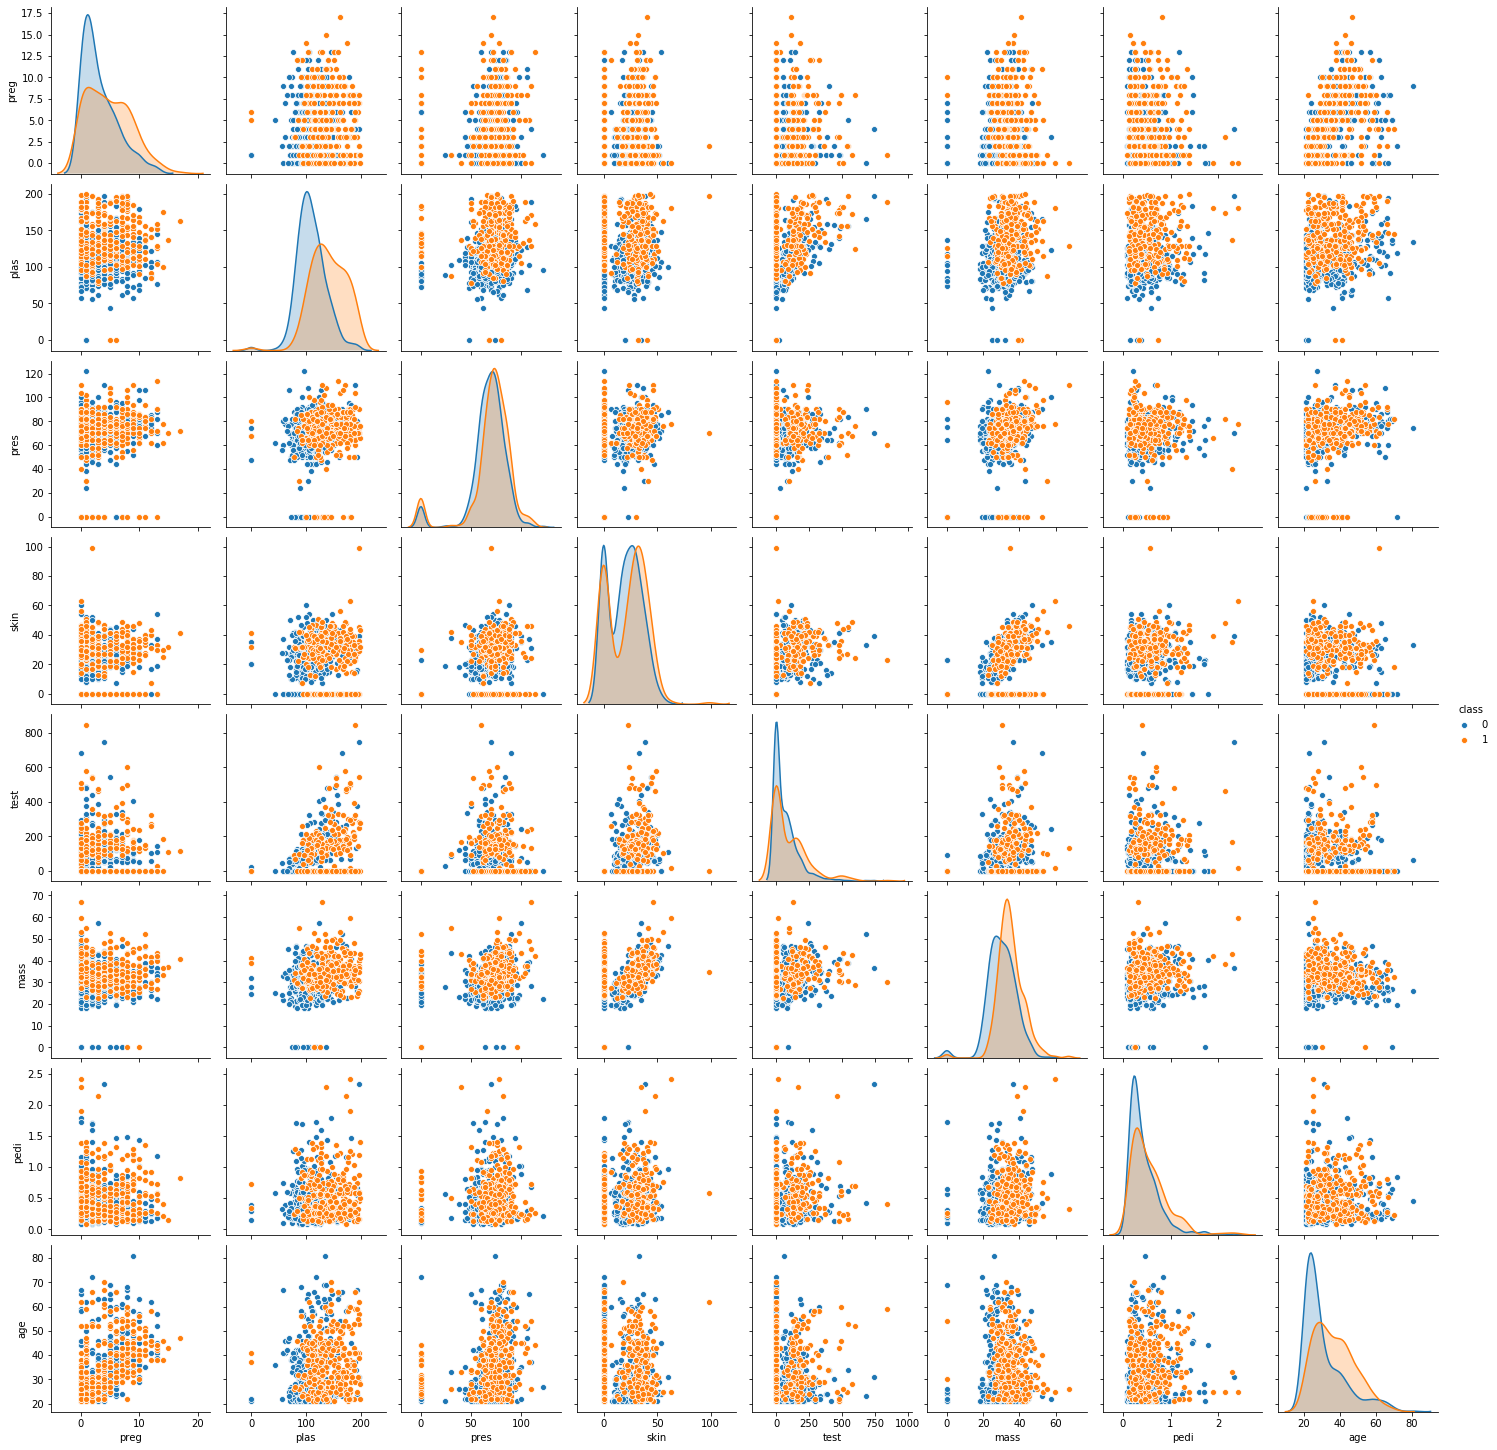

In [12]:
sns.pairplot(pima_df,diag_kind='kde', hue='class')

In [13]:
array = pima_df.values
X = array[:,0:7]
Y = array[:,8]  
test_size = 0.30
seed = 7  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

# LOGISTIC REGRESSION

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7619047619047619
[[131  16]
 [ 39  45]]


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [16]:


model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7792207792207793
[[134  13]
 [ 38  46]]


In [18]:
X_test_scaled

array([[-0.85673659, -1.13488396, -0.40652142, ..., -0.34936579,
        -0.53454225,  0.27946728],
       [ 0.82757109,  1.85351586,  0.70360317, ...,  0.82642585,
         0.56086874,  0.29791652],
       [ 2.51187878,  0.90116866,  1.00636442, ..., -0.45984285,
        -0.58490597,  0.74377299],
       ...,
       [-1.13745454,  1.22956425,  0.2999215 , ...,  0.1004337 ,
         2.7390998 ,  0.82986941],
       [-0.2953007 , -1.36476087, -0.60836225, ..., -0.54664626,
         0.35941385, -0.47080154],
       [ 0.54685314, -0.24821588,  1.30912567, ..., -0.68868821,
        -0.34567829, -1.02120367]])

    Analyzing the confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 46

True Negatives (TN): we correctly predicted that they don't have diabetes 134

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 13
Falsely predict positive Type I error


False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 38
Falsely predict negative Type II error

# DECISION TREE

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [19]:
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
predict = dt.predict(X_test_scaled)
dt_score = dt.score(X_test_scaled, y_test)
print(dt_score)
print(metrics.confusion_matrix(y_test, predict))

0.7186147186147186
[[117  30]
 [ 35  49]]


In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,predict))
print(end="")
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.78       147
         1.0       0.62      0.58      0.60        84

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231

[[117  30]
 [ 35  49]]


# RANDOM FOREST CLASSIFIER

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rfc_predict = rfc.predict(X_test_scaled)
rfc_score = rfc.score(X_test_scaled, y_test)
print(rfc_score)
print(metrics.confusion_matrix(y_test, rfc_predict))

0.7186147186147186
[[125  22]
 [ 43  41]]


In [30]:
print(classification_report(y_test,rfc_predict))
print(end="")
print(confusion_matrix(y_test,rfc_predict))

              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79       147
         1.0       0.65      0.49      0.56        84

    accuracy                           0.72       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.71      0.72      0.71       231

[[125  22]
 [ 43  41]]


# SUPPORT VECTOR MACHINE

In [34]:
from sklearn.svm import SVC

In [35]:
svc_model = SVC()

In [36]:
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
svc_predict = svc_model.predict(X_test_scaled)
svc_score = svc_model.score(X_test_scaled, y_test)
print(svc_score)
print(metrics.confusion_matrix(y_test, svc_predict))

0.7445887445887446
[[130  17]
 [ 42  42]]


In [57]:
print(classification_report(y_test,svc_predict))
print(end="")
print(confusion_matrix(y_test,svc_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82       147
         1.0       0.71      0.50      0.59        84

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231

[[130  17]
 [ 42  42]]


# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
NNH = KNeighborsClassifier(n_neighbors=33 , weights = 'distance' )

In [48]:
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='distance')

In [50]:
KNN_predict = NNH.predict(X_test_scaled)
KNN_score = NNH.score(X_test_scaled, y_test)
print(KNN_score)
print(metrics.confusion_matrix(y_test, KNN_predict))

0.7359307359307359
[[135  12]
 [ 49  35]]


In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 33


In [54]:
print(classification_report(y_test,KNN_predict))
print(end="")
print(confusion_matrix(y_test,KNN_predict))

              precision    recall  f1-score   support

         0.0       0.73      0.92      0.82       147
         1.0       0.74      0.42      0.53        84

    accuracy                           0.74       231
   macro avg       0.74      0.67      0.68       231
weighted avg       0.74      0.74      0.71       231

[[135  12]
 [ 49  35]]


# NAIVE BAYES

In [45]:
from sklearn.naive_bayes import GaussianNB

In [51]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
nb_predict = model.predict(X_test_scaled)
nb_score = model.score(X_test_scaled, y_test)
print(nb_score)
print(metrics.confusion_matrix(y_test, nb_predict))

0.7489177489177489
[[126  21]
 [ 37  47]]


In [53]:
print(classification_report(y_test,nb_predict))
print(end="")
print(confusion_matrix(y_test,nb_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       147
         1.0       0.69      0.56      0.62        84

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.74      0.75      0.74       231

[[126  21]
 [ 37  47]]


# BEST MODEL CHECK

In [58]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','DECISION TREE','SVM','KNN'],
    'Test Score': [ model_score, nb_score, rfc_score,dt_score,svc_score,KNN_score]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
0,Logistic Regression,0.779221
1,Gaussian Naive Bayes,0.748918
4,SVM,0.744589
5,KNN,0.735931
2,Random Forest,0.718615
3,DECISION TREE,0.718615
